In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

image_dir = '/content/drive/MyDrive/Colab Notebooks/Dataset'
for filename in os.listdir(image_dir):
    if filename.endswith(('.csv','.data','names')): # Filter for image files
        print(filename)

gender_submission.csv
mnist_test.csv
mnist_train.csv
housing.csv
weatherHistory.csv
wdbc.names
wdbc.data
Mall_Customers.csv
spam.csv


In [ ]:
# 1.      Iris flower classification
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
model = SVC(kernel='rbf', probability=True)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# 2.      Handwritten digit recognition with MNIST dataset
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Load MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype('float32')/255.0
x_test  = x_test.reshape(-1,28,28,1).astype('float32')/255.0
y_train = to_categorical(y_train,10)
y_test  = to_categorical(y_test,10)

# Model
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
print("Test accuracy:", model.evaluate(x_test, y_test)[1])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 68s 157ms/step - accuracy: 0.8505 - loss: 0.5165 - val_accuracy: 0.9808 - val_loss: 0.0648
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 58s 101ms/step - accuracy: 0.9792 - loss: 0.0679 - val_accuracy: 0.9842 - val_loss: 0.0531
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 103ms/step - accuracy: 0.9864 - loss: 0.0432 - val_accuracy: 0.9902 - val_loss: 0.0368
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 102ms/step - accuracy: 0.9903 - loss: 0.0327 - val_accuracy: 0.9898 - val_loss: 0.0334
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 101ms/step - accuracy: 0.9931 - loss: 0.0237 - val_accuracy: 0.9900 - val_loss: 0.0343
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9863 - loss: 0.0379
Test accuracy: 0.9898999929428101


In [24]:
# 3.      House price prediction with simple linear regression and multiple linear regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/housing.csv')  # provide this CSV
X = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms']]    # multiple regression
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

Coefficients: [2.12130455e+01 1.62357364e+05 1.22001486e+05]
Intercept: -2045201.8322998208
MSE: 34065346711.722992
R2: 0.7466762319884013


In [ ]:
# 4.      Stock price forecasting using historical market data.
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Download data (example: AAPL)
df = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
prices = df['Close'].values.reshape(-1,1)

# Scale
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

# Prepare sequences
def create_sequences(data, seq_len=60):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i,0])
        y.append(data[i,0])
    return np.array(X), np.array(y)

seq_len = 60
X, y = create_sequences(prices_scaled, seq_len)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train/test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_len,1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test,y_test))

# Predict and invert scale
pred = model.predict(X_test)
pred_inv = scaler.inverse_transform(pred)
print("Sample predictions:", pred_inv[:5].flatten())


/tmp/ipython-input-3481197429.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed

Epoch 1/5



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 0.0187 - val_loss: 0.0014
Epoch 2/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 3.3106e-04 - val_loss: 0.0018
Epoch 3/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 3.4950e-04 - val_loss: 0.0017
Epoch 4/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 3.1304e-04 - val_loss: 8.5981e-04
Epoch 5/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.7234e-04 - val_loss: 0.0012
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
Sample predictions: [130.88847 131.3534  131.84918 132.4323  133.1662 ]


In [13]:
# 5. Predicting temperature, precipitation, and other weather metrics based on meteorological data
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/weatherHistory.csv')

# Ensure proper datetime
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df = df.sort_values('Formatted Date').reset_index(drop=True)

# Features (today's weather)
X = df[['Humidity','Pressure (millibars)','Wind Speed (km/h)']]

# Target: predict next 5 days' temperatures
y = pd.DataFrame()
for i in range(1, 6):  # 1-day ahead to 5-days ahead
    y[f'temp_t+{i}'] = df['Temperature (C)'].shift(-i)

# Drop rows with NaN (because of shifting at the end)
data = pd.concat([X, y], axis=1).dropna()

X = data[['Humidity','Pressure (millibars)','Wind Speed (km/h)']]
y = data[[f'temp_t+{i}' for i in range(1,6)]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Multi-output Random Forest
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predict next 5 days
y_pred = model.predict(X_test)

# Evaluate MAE for each horizon
for i in range(5):
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    print(f"Day +{i+1} MAE:", mae)

Day +1 MAE: 5.026652476590126
Day +2 MAE: 5.277994947586742
Day +3 MAE: 5.5569983996773376
Day +4 MAE: 5.813655052158963
Day +5 MAE: 6.045347329934261


In [ ]:
# 6.      Classifying patient data to predict the presence of a disease, such as a tumor being malignant or benign
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names=['malignant','benign']))


Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

   malignant       0.94      0.98      0.96        47
      benign       0.98      0.96      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



               Age  Annual Income (k$)  Spending Score (1-100)
cluster                                                       
0        55.638298           54.382979               48.851064
1        39.871795           86.102564               19.358974
2        28.500000           61.677778               71.766667
3        43.125000           26.958333               22.083333


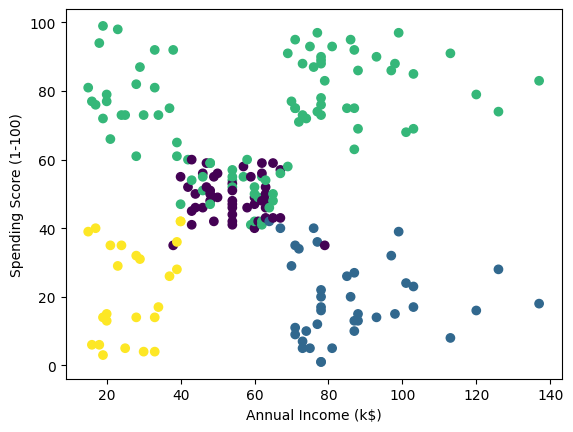

In [17]:
# 7. Grouping customers with similar traits or purchasing behaviors to create target marketing strategies.
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assume 'customers.csv' with ['age','income','spending_score']
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Mall_Customers.csv')  # provide CSV
X = df[['Genre','Age','Annual Income (k$)','Spending Score (1-100)']]
X_scaled = StandardScaler().fit_transform(X[['Age','Annual Income (k$)','Spending Score (1-100)']])

kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

print(df.groupby('cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean())  # see cluster centroids (approx)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster'])
plt.xlabel('Annual Income (k$)'); plt.ylabel('Spending Score (1-100)'); plt.show()

In [ ]:
# 8. Learn a robot to navigate a maze or an environment with obstacles to reach a goal.
import numpy as np
import random

# 4x4 grid, start (0,0), goal (3,3), obstacles example
n = 4
start = (0,0)
goal = (3,3)
obstacles = {(1,1),(2,1)}

# Map actions: up,down,left,right
actions = [(0,1),(0,-1),(1,0),(-1,0)]
Q = {}  # Q[(state),action] -> value

def valid(state):
    x,y = state
    return 0 <= x < n and 0 <= y < n and state not in obstacles

def next_state(s, a):
    nx, ny = s[0]+a[0], s[1]+a[1]
    return (nx, ny) if valid((nx,ny)) else s

# Initialize Q
for i in range(n):
    for j in range(n):
        if (i,j) not in obstacles:
            for a in range(len(actions)):
                Q[((i,j),a)] = 0.0

alpha = 0.7; gamma = 0.9; eps = 0.2
episodes = 2000

for ep in range(episodes):
    s = start
    while s != goal:
        if random.random() < eps:
            a = random.randrange(len(actions))
        else:
            vals = [Q[(s,ai)] for ai in range(len(actions))]
            a = int(np.argmax(vals))
        s2 = next_state(s, actions[a])
        reward = 1.0 if s2 == goal else -0.01
        # Q-update
        best_next = max(Q[(s2,ai)] for ai in range(len(actions)))
        Q[(s,a)] += alpha * (reward + gamma*best_next - Q[(s,a)])
        s = s2

# Derive policy
policy = {}
for i in range(n):
    for j in range(n):
        s=(i,j)
        if s not in obstacles:
            best_a = max(range(len(actions)), key=lambda ai: Q[(s,ai)])
            policy[s] = actions[best_a]
print("Policy (action vectors) for states:", policy)


Policy (action vectors) for states: {(0, 0): (0, 1), (0, 1): (0, 1), (0, 2): (0, 1), (0, 3): (1, 0), (1, 0): (1, 0), (1, 2): (0, 1), (1, 3): (1, 0), (2, 0): (1, 0), (2, 2): (0, 1), (2, 3): (1, 0), (3, 0): (0, 1), (3, 1): (0, 1), (3, 2): (0, 1), (3, 3): (0, 1)}


In [19]:
# 9.    Titanic survival prediction with data preprocessing

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# seaborn has titanic dataset; or use local 'titanic.csv'
import seaborn as sns
df = sns.load_dataset('titanic').dropna(subset=['survived', 'age', 'embarked'])  # drop NA target rows and features with NaNs

# Simple preprocessing
X = df[['pclass','sex','age','fare','embarked']]
y = df['survived']

numeric_features = ['age','fare']
numeric_transformer = StandardScaler()
categorical_features = ['pclass','sex','embarked']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

clf = Pipeline(steps=[('preproc', preprocessor),
                      ('clf', LogisticRegression(max_iter=500))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        80
           1       0.87      0.63      0.73        63

    accuracy                           0.80       143
   macro avg       0.82      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



In [22]:
# 10.    Spam email detection using Naive Bayes classifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# If you have SMS Spam Collection: download 'spam.csv' with columns ['v1','v2'] where v1 is label ham/spam, v2 is text
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/spam.csv', encoding='latin-1')[['v1','v2']].rename(columns={'v1':'label','v2':'text'})
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print(classification_report(y_test, pred))

import math

# Step 1: Read input from user (for test data later)
def read_input():
    x1 = int(input("Enter input x1 (0 or 1): "))
    x2 = int(input("Enter input x2 (0 or 1): "))
    return [x1, x2]

# Step 2: Initialize parameters
def initialize():
    weights = [0.3, -0.2]   # w1, w2
    bias = 0.4
    lr = 0.2
    epochs = 50
    threshold = 0.5
    return weights, bias, lr, epochs, threshold

# Step 3: Net input calculation
def net_input(weights, bias, inputs):
    return sum(w*x for w, x in zip(weights, inputs)) + bias

# Step 4: Activation functions
def threshold_activation(net, threshold=0.5):
    return 1 if net >= threshold else 0

def step_activation(net):
    return 1 if net >= 0 else 0

def sigmoid_activation(net):
    return 1 / (1 + math.exp(-net))

def tanh_activation(net):
    return math.tanh(net)

# Step 5: Weight and bias update
def update_weights(weights, bias, lr, error, inputs):
    new_weights = [w + lr * error * x for w, x in zip(weights, inputs)]
    new_bias = bias + lr * error
    return new_weights, new_bias

# Step 6: Train neural network till convergence
def train_network():
    # Training data for AND gate
    training_data = [
        ([0, 0], 0),
        ([0, 1], 0),
        ([1, 0], 0),
        ([1, 1], 1)
    ]

    weights, bias, lr, epochs, threshold = initialize()

    for epoch in range(epochs):
        total_error = 0
        for inputs, target in training_data:
            net = net_input(weights, bias, inputs)
            output = threshold_activation(net, threshold)   # Training uses threshold
            error = target - output
            weights, bias = update_weights(weights, bias, lr, error, inputs)
            total_error += abs(error)

        print(f"Epoch {epoch+1}: Weights={weights}, Bias={bias}, Total Error={total_error}")

        # Stop if network converges (no error)
        if total_error == 0:
            break

    return weights, bias

# Step 7: Display final weights & test with chosen activation
if __name__ == "__main__":
    final_weights, final_bias = train_network()
    print("\nFinal Weights:", final_weights)
    print("Final Bias:", final_bias)

    # User chooses activation function
    print("\nChoose Activation Function:")
    print("1. Threshold")
    print("2. Step")
    print("3. Sigmoid")
    print("4. Tanh")
    choice = int(input("Enter choice (1-4): "))

    if choice == 1:
        activation = lambda net: threshold_activation(net)
        name = "Threshold"
    elif choice == 2:
        activation = step_activation
        name = "Step"
    elif choice == 3:
        activation = sigmoid_activation
        name = "Sigmoid"
    elif choice == 4:
        activation = tanh_activation
        name = "Tanh"
    else:
        print("Invalid choice, defaulting to Threshold.")
        activation = lambda net: threshold_activation(net)
        name = "Threshold"

    print(f"\n--- Testing AND Gate with {name} Activation ---")
    for x1 in [0, 1]:
        for x2 in [0, 1]:
            net = net_input(final_weights, final_bias, [x1, x2])
            output = activation(net)
            print(f"Input: {[x1, x2]} → Net: {net:.3f} → Output: {output:.3f}" if name in ["Sigmoid", "Tanh"] else f"Input: {[x1, x2]} → Output: {output}")


              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

Epoch 1: Weights=[0.3, 0.0], Bias=0.4, Total Error=2
Epoch 2: Weights=[0.3, 0.2], Bias=0.4, Total Error=2
Epoch 3: Weights=[0.3, 0.2], Bias=0.2, Total Error=3
Epoch 4: Weights=[0.3, 0.4], Bias=0.2, Total Error=2
Epoch 5: Weights=[0.3, 0.2], Bias=0.0, Total Error=1
Epoch 6: Weights=[0.3, 0.2], Bias=0.0, Total Error=0

Final Weights: [0.3, 0.2]
Final Bias: 0.0

Choose Activation Function:
1. Threshold
2. Step
3. Sigmoid
4. Tanh
Enter choice (1-4): 1

--- Testing AND Gate with Threshold Activation ---
Input: [0, 0] → Output: 0
Input: [0, 1] → Output: 0
Input: [1, 0] → Output: 0
Input: [1, 1] → Output: 1
